<a href="https://colab.research.google.com/github/rupeshrgarje/BigMartSalesPrediction/blob/main/Mini_Project_DL_Regression_RG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Importing the dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
# Getting an idea about the duplicates in the data
df.duplicated().sum()

np.int64(1)

In [13]:
# np.int64(1) means that there is 1 duplicate row in the dataset
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
# Seperating the data into input features and target variables
X = df.drop('charges', axis=1)
y = df['charges']

In [16]:
# Getting the list of columns
print(X.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [17]:
# Getting the list of categorical columns and numerical columns
categorical = ['sex', 'smoker', 'region']
numerical = ['age', 'bmi', 'children']

In [18]:
# Preprocessing columns
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

In [19]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [20]:
# Preprocessing the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [21]:
# Baseline ANN Model
model_base = Sequential([
    Dense(8, input_dim = X_train.shape[1], activation = 'relu'),
    Dense(1)
])


In [25]:
# Compiling the model
model_base.compile(optimizer='adam', loss='mse', metrics = ["r2_score"])

In [26]:
# Train the model
history_base = model_base.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=50, verbose=1)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 322705312.0000 - r2_score: -1.1636 - val_loss: 315924032.0000 - val_r2_score: -1.1385
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 313107072.0000 - r2_score: -1.2896 - val_loss: 315857856.0000 - val_r2_score: -1.1381
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 331362720.0000 - r2_score: -1.1609 - val_loss: 315790976.0000 - val_r2_score: -1.1376
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 307002080.0000 - r2_score: -1.2473 - val_loss: 315723168.0000 - val_r2_score: -1.1371
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 324207424.0000 - r2_score: -1.1576 - val_loss: 315653056.0000 - val_r2_score: -1.1367
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 333656896.0000 - r2_score: -1.1775 - val_loss: 315581344.0000 - val_r2_score: -1.1362
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 311909344.0000 - r2_score: -1.2207 - val_loss: 315510944.0000 - val_r2_score:

In [28]:
# Model Evaluation
loss_base, r2_base = model_base.evaluate(X_test, y_test)
print(f'Loss (MSE): {loss_base}')
print(f'R2 Score: {r2_base}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 313729216.0000 - r2_score: -1.1526 
Loss (MSE): 311229568.0
R2 Score: -1.1067266464233398


In [ ]:
''' Negative value of R2 score means that if we would have given average value
    as predicted value for every data point, it would have been better than
    creating the model.
'''

In [29]:
# Optimized ANN Model
from tensorflow.keras.layers import Dropout

# Optimized model with Dropouts
model_opt = Sequential([
    Dense(128, input_dim = X_train.shape[1], activation = 'relu'),
    Dropout(0.3),
    Dense(64, input_dim = X_train.shape[1], activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.1),
    Dense(1)
])

In [30]:
# Compiling the model
model_opt.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
                  loss='mse', metrics = ["r2_score"])

In [32]:
# Early Stopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [33]:
# Training the model
history_opt = model_opt.fit(X_train, y_train, validation_data = (X_test, y_test),
                            epochs=100, batch_size = 32, verbose=1, callbacks = [early_stop])

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 323421440.0000 - r2_score: -1.2929 - val_loss: 318391328.0000 - val_r2_score: -1.1552
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 331237600.0000 - r2_score: -1.1913 - val_loss: 317423936.0000 - val_r2_score: -1.1487
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 381349408.0000 - r2_score: -1.2123 - val_loss: 312362400.0000 - val_r2_score: -1.1144
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 325323424.0000 - r2_score: -1.1524 - val_loss: 294543456.0000 - val_r2_score: -0.9938
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 252120960.0000 - r2_score: -1.0122 - val_loss: 253190896.0000 - val_r2_score: -0.7139
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 247884000.0000 - r2_score: -0.6081 - val_loss: 188988688.0000 - val_r2_score: -0.2793
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 154895872.0000 - r2_score: -0.1206 - val_loss: 133616776.0000 - val_r2

In [36]:
# Model Evaluation
train_loss_opt, train_r2_opt = model_opt.evaluate(X_train, y_train)
print(f'Loss (MSE): {train_loss_opt}')
print(f'R2 Score: {train_r2_opt}')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23425248.0000 - r2_score: 0.8247
Loss (MSE): 24835772.0
R2 Score: 0.8301726579666138


In [37]:
# Model Evaluation
test_loss_opt, test_r2_opt = model_opt.evaluate(X_test, y_test)
print(f'Loss (MSE): {test_loss_opt}')
print(f'R2 Score: {test_r2_opt}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30003412.0000 - r2_score: 0.7938 
Loss (MSE): 32117866.0
R2 Score: 0.7825927734375


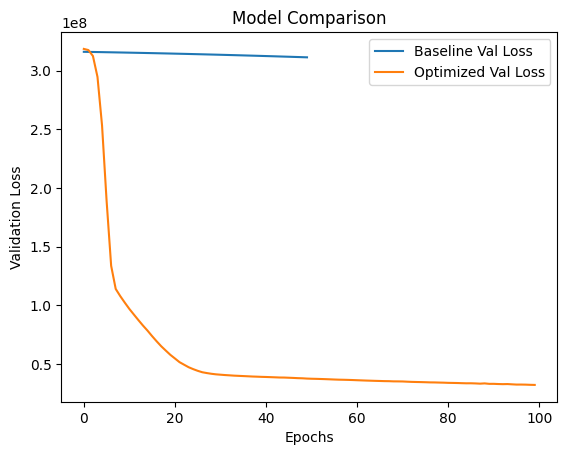

In [38]:
# Compare Learning curves
plt.plot(history_base.history['val_loss'], label = 'Baseline Val Loss')
plt.plot(history_opt.history['val_loss'], label = 'Optimized Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Model Comparison')
plt.legend()
plt.show()

In [40]:
# Predictions
# Example from test set
sample = X_test[0].reshape(1,-1)
predicted_charge = model_opt.predict(sample)
print(f'Predicted Charge: {predicted_charge}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Charge: [[9438.16]]


In [41]:
# Custom Input Example
custom_data = pd.DataFrame({
    'age': [30],
    'sex': ['male'],
    'bmi': [25.5],
    'children': [2],
    'smoker': ['yes'],
    'region': ['southeast']
})

In [42]:
custom_processed = preprocessor.transform(custom_data)
predicted_charge = model_opt.predict(custom_processed)
print(f'Predicted Charge: {predicted_charge}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Charge: [[22346.71]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


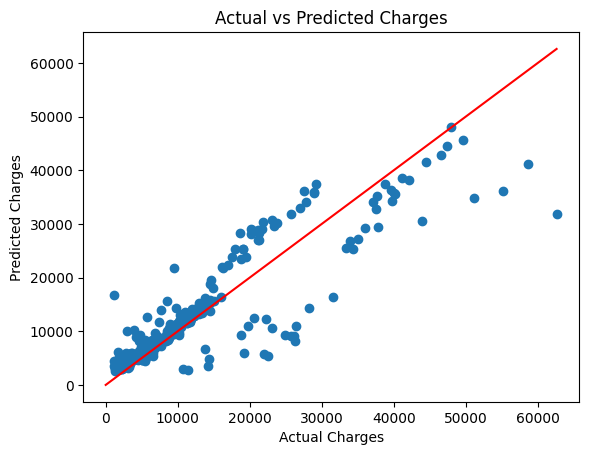

In [43]:
# Actual vs Predicted Plot
y_pred = model_opt.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.plot([0, y_test.max()], [0, y_test.max()], color = 'red')
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


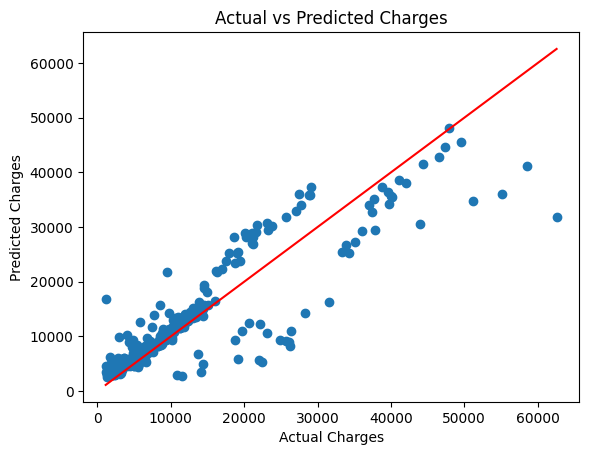

In [44]:
# Actual vs Predicted Plot
y_pred = model_opt.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.plot([min(y_test), y_test.max()], [min(y_test), y_test.max()], color = 'red')
plt.show()